In [27]:
import os
import folium
from folium import plugins
from folium.plugins import HeatMap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker
import IPython
from IPython.display import Image

%matplotlib inline

In [3]:
pwd

'C:\\Users\\Aluno\\Desktop\\Análise Furtos Veículos 2018'

In [4]:
data = pd.read_csv(r'Dados_Furtos_de_Veiculos_2018_Jan-Dez.csv', low_memory=False,delimiter=';', encoding='iso-8859-1', decimal=',')
filled_data = data
filled_data['LATITUDE'].fillna(filled_data['LATITUDE'].mean(), inplace=True)
filled_data['LONGITUDE'].fillna(filled_data['LONGITUDE'].mean(), inplace=True)
data.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2017,4102,4102/2017,01/01/2018 00:45,01/01/2018 01:12,31/12/2017,A NOITE,01/01/2018,01/01/2018 00:45,Desconhecida,...,BPI7536,SP,S.JOSE DOS CAMPOS,Cinza,FIAT/UNO ELETRONIC,1994.0,1994.0,AUTOMOVEL,NaN,NaN
1,2018,2,fev/18,01/01/2018 02:04,01/01/2018 02:13,01/01/2018,DE MADRUGADA,01/01/2018,01/01/2018 02:04,Desconhecida,...,CCS6913,SP,S.JOSE DOS CAMPOS,Vermelho,GM/MONZA GL,1994.0,1994.0,AUTOMOVEL,NaN,NaN
2,2018,7,jul/18,01/01/2018 10:13,01/01/2018 10:21,01/01/2018,DE MADRUGADA,01/01/2018,01/01/2018 10:13,Desconhecida,...,FDX0794,SP,S.JOSE DOS CAMPOS,Preta,YAMAHA/FAZER250 BLUEFLEX,2012.0,2013.0,MOTOCICLO,NaN,NaN
3,2018,9,set/18,01/01/2018 10:53,01/01/2018 11:12,01/01/2018,PELA MANHÃ,01/01/2018,01/01/2018 10:53,Desconhecida,...,KZF7010,SP,S.JOSE DOS CAMPOS,Vermelho,YAMAHA/FACTOR YBR125 ED,2011.0,2011.0,MOTOCICLO,NaN,NaN
4,2018,17,17/2018,01/01/2018 19:09,01/01/2018 19:16,01/01/2018,PELA MANHÃ,01/01/2018,01/01/2018 19:09,Desconhecida,...,KWZ1020,SP,S.JOSE DOS CAMPOS,Prata,YAMAHA/YBR 125ED,2007.0,2007.0,MOTOCICLO,NaN,NaN


In [5]:
data.rename(columns={'DESCR_MARCA_VEICULO': 'Modelo_Veiculos',
                     'DATAOCORRENCIA': 'Data_Ocorrencia',
                     'PERIDOOCORRENCIA': 'Periodo_Ocorrencia'
}, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 54 columns):
ANO_BO                      3158 non-null int64
NUM_BO                      3158 non-null int64
NUMERO_BOLETIM              3158 non-null object
BO_INICIADO                 3158 non-null object
BO_EMITIDO                  3158 non-null object
Data_Ocorrencia             3158 non-null object
Periodo_Ocorrencia          3158 non-null object
DATACOMUNICACAO             3158 non-null object
DATAELABORACAO              3158 non-null object
BO_AUTORIA                  3158 non-null object
FLAGRANTE                   3158 non-null object
NUMERO_BOLETIM_PRINCIPAL    145 non-null object
LOGRADOURO                  2738 non-null object
NUMERO                      3148 non-null float64
BAIRRO                      2640 non-null object
CIDADE                      2738 non-null object
UF                          2738 non-null object
LATITUDE                    3158 non-null float64
LONGITUDE   

# 15 Primeiros registros

In [23]:
data.head(15)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,Data_Ocorrencia,Periodo_Ocorrencia,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,Modelo_Veiculos,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2017,4102,4102/2017,01/01/2018 00:45,01/01/2018 01:12,31/12/2017,A NOITE,01/01/2018,01/01/2018 00:45,Desconhecida,...,BPI7536,SP,S.JOSE DOS CAMPOS,Cinza,FIAT/UNO ELETRONIC,1994.0,1994.0,AUTOMOVEL,NaN,NaN
1,2018,2,fev/18,01/01/2018 02:04,01/01/2018 02:13,01/01/2018,DE MADRUGADA,01/01/2018,01/01/2018 02:04,Desconhecida,...,CCS6913,SP,S.JOSE DOS CAMPOS,Vermelho,GM/MONZA GL,1994.0,1994.0,AUTOMOVEL,NaN,NaN
2,2018,7,jul/18,01/01/2018 10:13,01/01/2018 10:21,01/01/2018,DE MADRUGADA,01/01/2018,01/01/2018 10:13,Desconhecida,...,FDX0794,SP,S.JOSE DOS CAMPOS,Preta,YAMAHA/FAZER250 BLUEFLEX,2012.0,2013.0,MOTOCICLO,NaN,NaN
3,2018,9,set/18,01/01/2018 10:53,01/01/2018 11:12,01/01/2018,PELA MANHÃ,01/01/2018,01/01/2018 10:53,Desconhecida,...,KZF7010,SP,S.JOSE DOS CAMPOS,Vermelho,YAMAHA/FACTOR YBR125 ED,2011.0,2011.0,MOTOCICLO,NaN,NaN
4,2018,17,17/2018,01/01/2018 19:09,01/01/2018 19:16,01/01/2018,PELA MANHÃ,01/01/2018,01/01/2018 19:09,Desconhecida,...,KWZ1020,SP,S.JOSE DOS CAMPOS,Prata,YAMAHA/YBR 125ED,2007.0,2007.0,MOTOCICLO,NaN,NaN
5,2018,17,17/2018,01/01/2018 19:09,01/01/2018 19:16,01/01/2018,PELA MANHÃ,01/01/2018,01/01/2018 19:09,Desconhecida,...,KZF7010,SP,S.JOSE DOS CAMPOS,Vermelho,YAMAHA/FACTOR YBR125 ED,2011.0,2011.0,MOTOCICLO,NaN,NaN
6,2018,18,18/2018,01/01/2018 19:53,01/01/2018 20:15,01/01/2018,EM HORA INCERTA,01/01/2018,01/01/2018 19:53,Desconhecida,...,CFH6227,SP,S.JOSE DOS CAMPOS,Vermelho,FIAT/PALIO 16V,1997.0,1997.0,AUTOMOVEL,NaN,NaN
7,2018,3621,3621/2018,02/01/2018 13:41,02/01/2018 13:41,02/01/2018,PELA MANHÃ,02/01/2018,02/01/2018 13:41,Desconhecida,...,EGO7045,SP,S.JOSE DOS CAMPOS,Branco,FIAT/UNO MILLE ECONOMY,2008.0,2008.0,AUTOMOVEL,NaN,NaN
8,2018,12,dez/18,02/01/2018 17:59,02/01/2018 18:04,27/12/2017,A TARDE,02/01/2018,02/01/2018 17:59,Desconhecida,...,CND8286,SP,S.JOSE DOS CAMPOS,Branco,VW/GOL MI,1997.0,1997.0,AUTOMOVEL,NaN,NaN
9,2018,23,23/2018,02/01/2018 19:28,02/01/2018 19:40,02/01/2018,A NOITE,02/01/2018,02/01/2018 19:28,Desconhecida,...,CTK7920,SP,S.JOSE DOS CAMPOS,Cinza,VW/PARATI LS,1985.0,1986.0,AUTOMOVEL,NaN,NaN


# 15 Registros aleatórios

In [21]:
data.sample(15)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,Data_Ocorrencia,Periodo_Ocorrencia,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,Modelo_Veiculos,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
2271,2018,870,870/2018,14/09/2018 10:09,14/09/2018 10:41,13/09/2018,A NOITE,14/09/2018,14/09/2018 10:09,Desconhecida,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1855,2018,2545,2545/2018,01/08/2018 07:24,01/08/2018 08:46,01/08/2018,DE MADRUGADA,01/08/2018,01/08/2018 07:24,Conhecida,...,DEL7055,SP,SAO PAULO,Prata,GM/S10 2.4 S,2001.0,2001.0,CAMINHONETE,NaN,NaN
2564,2018,2501,2501/2018,18/10/2018 14:22,18/10/2018 14:42,18/10/2018,DE MADRUGADA,18/10/2018,18/10/2018 14:22,Desconhecida,...,CFH3643,SP,SAO JOSE DOS CAMPOS,Vermelho,GM/CORSA WIND,1996.0,1997.0,AUTOMOVEL,NaN,NaN
641,2018,194,194/2018,15/03/2018 16:59,15/03/2018 17:12,15/03/2018,PELA MANHÃ,15/03/2018,15/03/2018 16:59,Ignorado,...,DSZ2939,SP,CARAGUATATUBA,Prata,RENAULT/CLIO EXP 10 16VH,2007.0,2008.0,AUTOMOVEL,NaN,NaN
2182,2018,1667,1667/2018,03/09/2018 10:42,03/09/2018 11:09,03/09/2018,EM HORA INCERTA,03/09/2018,03/09/2018 10:42,Desconhecida,...,DZW5559,SP,SAO JOSE DOS CAMPOS,Preta,FIAT/PALIO FIRE FLEX,2008.0,2008.0,AUTOMOVEL,NaN,NaN
85,2018,56924,56924/2018,13/01/2018 12:16,13/01/2018 12:16,13/01/2018,PELA MANHÃ,13/01/2018,13/01/2018 12:16,Desconhecida,...,EIK2975,SP,S.PAULO,Preta,VW/FOX 1.0,2009.0,2009.0,AUTOMOVEL,NaN,NaN
2649,2018,3541,3541/2018,27/10/2018 21:40,27/10/2018 21:48,27/10/2018,PELA MANHÃ,27/10/2018,27/10/2018 21:40,Desconhecida,...,BQD2800,SP,CACAPAVA,Prata,VW/SAVEIRO CL 1.8,1993.0,1993.0,CAMINHONETE,NaN,NaN
2833,2018,1456876,1456876/2018,15/11/2018 20:06,15/11/2018 20:07,15/11/2018,A TARDE,15/11/2018,15/11/2018 20:06,Desconhecida,...,FVI7147,SP,CAÇAPAVA,Prata,HYUNDAI/HB20 1.0M COMFOR,2017.0,NaN,AUTOMOVEL,NaN,NaN
914,2018,1059,1059/2018,20/04/2018 12:36,20/04/2018 13:19,26/02/2018,EM HORA INCERTA,20/04/2018,20/04/2018 12:36,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
482,2018,656,656/2018,25/02/2018 12:08,25/02/2018 12:15,25/02/2018,PELA MANHÃ,25/02/2018,25/02/2018 12:08,Desconhecida,...,MPK8875,SP,S.JOSE DOS CAMPOS,Verde,FIAT/UNO ELETRONIC,1994.0,1994.0,AUTOMOVEL,NaN,NaN


# Os 15 veículos mais visados em 2018

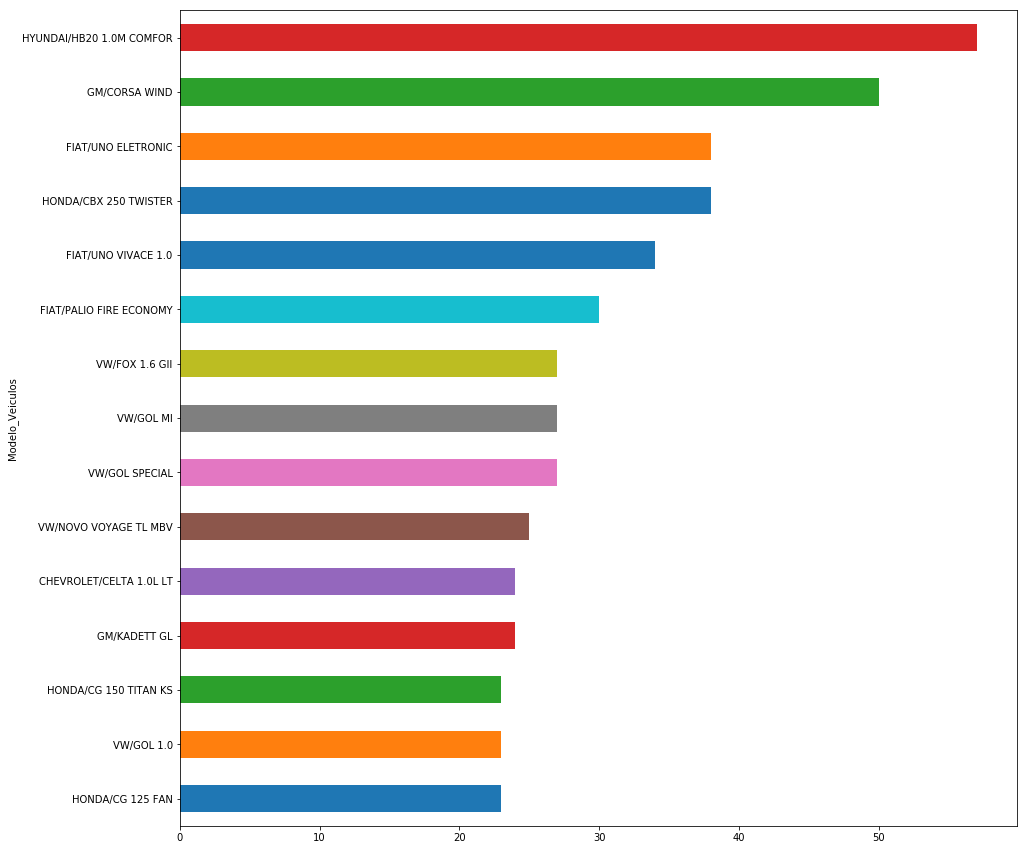

In [24]:
data.groupby('Modelo_Veiculos').size().sort_values().tail(15).plot(kind='barh', figsize=(15,15))

# Registro por período do dia

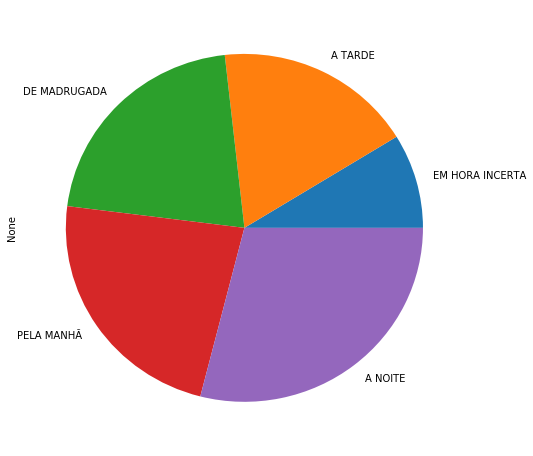

In [18]:
data.groupby('Periodo_Ocorrencia').size().sort_values().plot(kind= 'pie', figsize=(8,8))

# Mapa de Calor

Locais mais visados para furtos em São José dos Campos e Caçapava

In [10]:
m = folium.Map([-23.2082, -45.8494], zoom_start=11)

In [31]:
LOCAIS = data[['LATITUDE', 'LONGITUDE']].values #utilizar .values
HeatMap(LOCAIS).add_to(m)
m

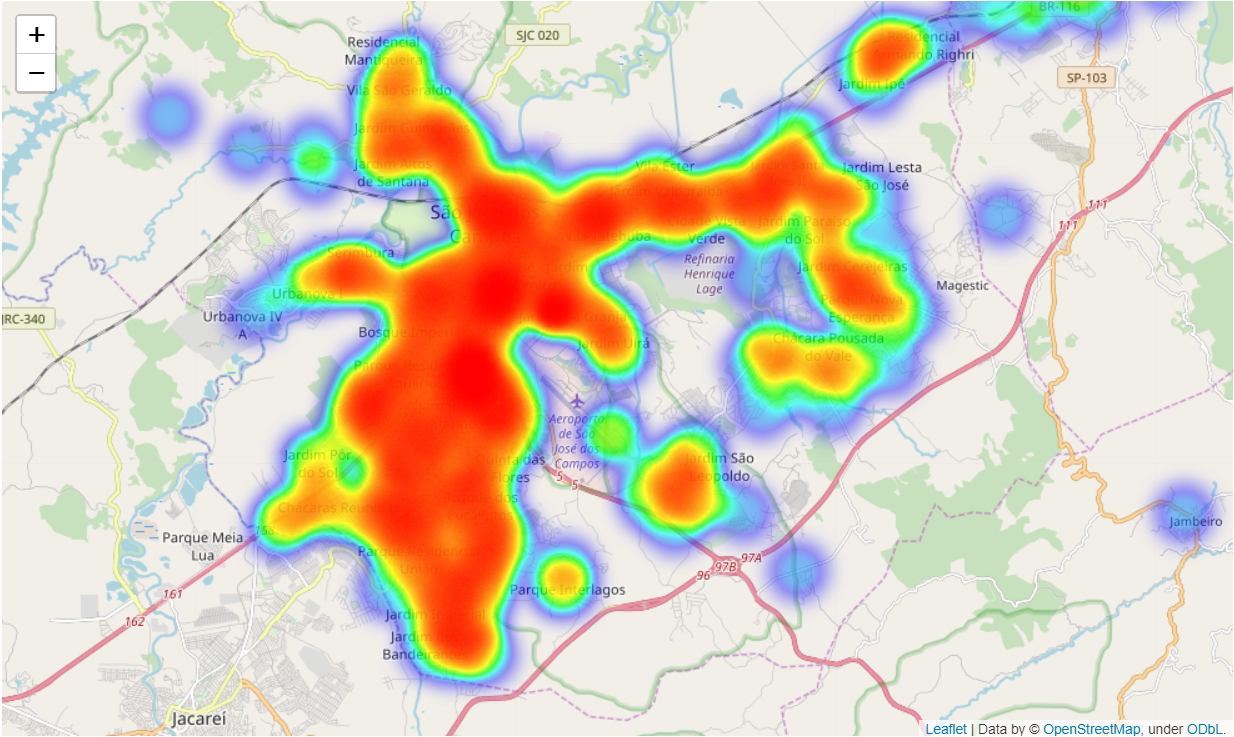

In [32]:
Image("Mapa_Calor_Furtos_Veículos_2018.png")